In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data  = pd.read_csv("Real estate.csv")

In [3]:
data.head()

No  X1_transaction_date  X2_house_age  \
0   1             2012.917          32.0   
1   2             2012.917          19.5   
2   3             2013.583          13.3   
3   4             2013.500          13.3   
4   5             2012.833           5.0   

   X3_distance_to_the_nearest_MRT_station  X4_number_of_convenience_stores  \
0                                84.87882                               10   
1                               306.59470                                9   
2                               561.98450                                5   
3                               561.98450                                5   
4                               390.56840                                5   

   X5_latitude  X6_longitude  Y_house_price_of_unit_area  
0     24.98298     121.54024                        37.9  
1     24.98034     121.53951                        42.2  
2     24.98746     121.54391                        47.3  
3     24.98746     121.54391                        54.8  
4     24.97937     121.54245                        43.1

In [4]:
data = data.drop(['No','X1_transaction_date'],axis=1)

In [5]:
data.head()

X2_house_age  X3_distance_to_the_nearest_MRT_station  \
0          32.0                                84.87882   
1          19.5                               306.59470   
2          13.3                               561.98450   
3          13.3                               561.98450   
4           5.0                               390.56840   

   X4_number_of_convenience_stores  X5_latitude  X6_longitude  \
0                               10     24.98298     121.54024   
1                                9     24.98034     121.53951   
2                                5     24.98746     121.54391   
3                                5     24.98746     121.54391   
4                                5     24.97937     121.54245   

   Y_house_price_of_unit_area  
0                        37.9  
1                        42.2  
2                        47.3  
3                        54.8  
4                        43.1

In [6]:
data.columns=['house_age', 'MRTdistance','StoreDistance', 'latitude', 'longitude', 'price']

In [7]:
data.StoreDistance.unique()

array([10,  9,  5,  3,  7,  6,  1,  4,  2,  8,  0], dtype=int64)

In [8]:
data.corr()

house_age  MRTdistance  StoreDistance  latitude  longitude  \
house_age       1.000000     0.025622       0.049593  0.054420  -0.048520   
MRTdistance     0.025622     1.000000      -0.602519 -0.591067  -0.806317   
StoreDistance   0.049593    -0.602519       1.000000  0.444143   0.449099   
latitude        0.054420    -0.591067       0.444143  1.000000   0.412924   
longitude      -0.048520    -0.806317       0.449099  0.412924   1.000000   
price          -0.210567    -0.673613       0.571005  0.546307   0.523287   

                  price  
house_age     -0.210567  
MRTdistance   -0.673613  
StoreDistance  0.571005  
latitude       0.546307  
longitude      0.523287  
price          1.000000

<Axes: xlabel='house_age', ylabel='price'>

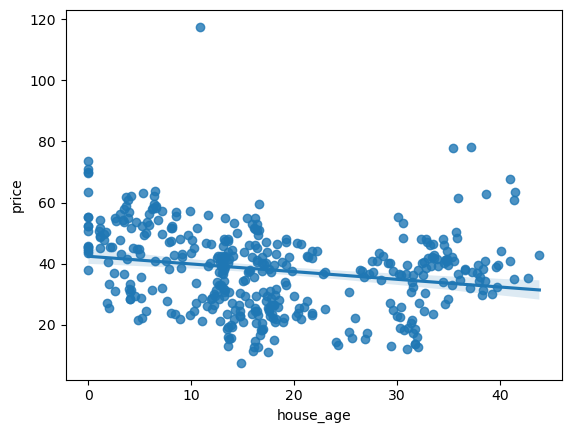

In [9]:
import seaborn as sns
sns.regplot(x=data['house_age'], y=data.price)

<Axes: xlabel='MRTdistance', ylabel='price'>

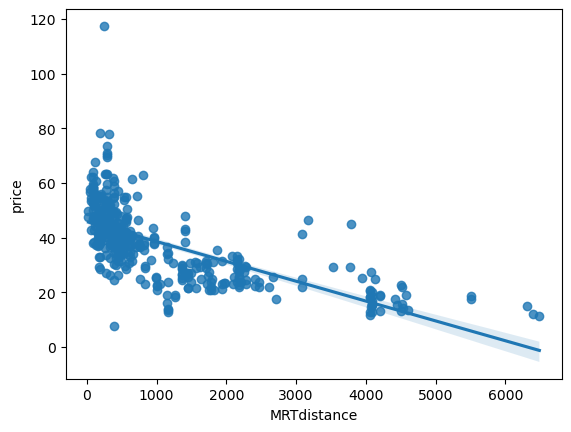

In [10]:
sns.regplot(x=data.MRTdistance, y=data.price)

<Axes: xlabel='StoreDistance', ylabel='price'>

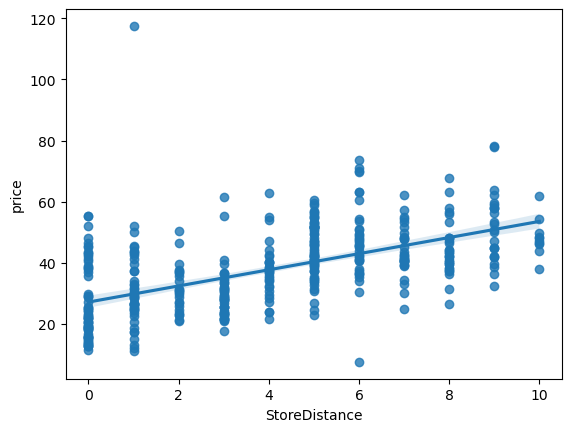

In [11]:
sns.regplot(x=data.StoreDistance, y=data.price)

<Axes: xlabel='latitude', ylabel='price'>

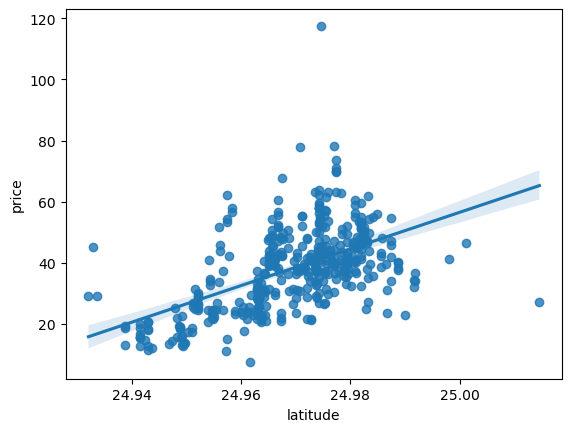

In [12]:
sns.regplot(x=data.latitude, y=data.price)

<Axes: xlabel='longitude', ylabel='price'>

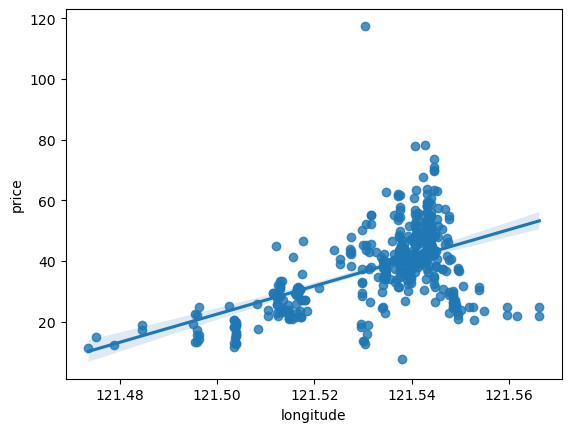

In [13]:
sns.regplot(x=data.longitude, y=data.price)

In [14]:
X = data.drop('price',axis=1)
y = data.price

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=123)

In [16]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [17]:
lr.fit(X_train,y_train)

LinearRegression()

In [18]:
y_pred_train = lr.predict(X_train)

In [19]:
from  sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score

In [20]:
r2_score(y_train,y_pred_train)

0.5381856642445282

In [21]:
y_pred_test = lr.predict(X_test)

In [22]:
r2_score(y_test,y_pred_test)

0.6622675037049228

In [23]:
root_mean_squared_error(y_train,y_pred_train)

9.494054788170384

In [24]:
root_mean_squared_error(y_test,y_pred_test)

7.352203151865316

In [25]:
X  = data.drop(['house_age', 'price'],axis=1)
y  = data.price

In [26]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=123)

In [27]:
lr2 = LinearRegression()

In [28]:
lr2.fit(X_train,y_train)

LinearRegression()

In [29]:
y_pred_train = lr2.predict(X_train)

In [30]:
r2_score(y_train,y_pred_train)

0.49379967679921455

In [31]:
y_pred_test=lr2.predict(X_test)

In [32]:
r2_score(y_test,y_pred_test)

0.5963289344452756

# MinMaxScaling and Standardization

In [33]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
normalized_X = normalizer.fit_transform(X)

In [34]:
normalizer.feature_names_in_

array(['MRTdistance', 'StoreDistance', 'latitude', 'longitude'],
      dtype=object)

In [35]:
X = pd.DataFrame(data=normalized_X, columns=normalizer.feature_names_in_)
X

MRTdistance  StoreDistance  latitude  longitude
0       0.563353       0.066371  0.165816   0.806680
1       0.926623       0.027201  0.075498   0.367329
2       0.976444       0.008687  0.043416   0.211182
3       0.976444       0.008687  0.043416   0.211182
4       0.952988       0.012200  0.060950   0.296564
..           ...            ...       ...        ...
409     0.999539       0.000000  0.006107   0.029752
410     0.588075       0.058511  0.162364   0.790179
411     0.953012       0.017063  0.060888   0.296261
412     0.644993       0.030770  0.153643   0.747951
413     0.588075       0.058511  0.162364   0.790179

[414 rows x 4 columns]

In [36]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=123)

In [37]:
lr3 = LinearRegression()

In [38]:
lr3.fit(X_train,y_train)

LinearRegression()

In [39]:
y_pred_train = lr3.predict(X_train)

In [40]:
r2_score(y_train,y_pred_train)

0.5349503854829745

In [41]:
y_pred_test=lr3.predict(X_test)

In [42]:
r2_score(y_test,y_pred_test)

0.5051512096901281

# Standardization

In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
standardized_X = scaler.transform(X_train)
standardized_X_test = scaler.transform(X_test)

In [44]:
lr4 = LinearRegression()

In [45]:
lr4.fit(standardized_X,y_train)

LinearRegression()

In [46]:
y_pred_train = lr4.predict(standardized_X)
r2_score(y_train,y_pred_train)

0.5349503854829797

In [47]:
y_pred_test=lr4.predict(standardized_X_test)

In [48]:
r2_score(y_test,y_pred_test)

0.505151209690119

# Outlier Removal from data

In [49]:
def outlier_removal(col):
    q1 = np.percentile(col,25)
    q3 = np.percentile(col,75)
    iqr = q3-q1
    lb,ub = q1- 1.5*iqr , q3 +  1.5*iqr
    return lb,ub

In [50]:
lb,ub = outlier_removal(data.house_age)
data = data[(data.house_age>=lb) & (data.house_age<=ub)]

In [51]:
lb,ub = outlier_removal(data.MRTdistance)
data = data[(data.MRTdistance>=lb) & (data.MRTdistance<=ub)]

In [52]:
lb,ub = outlier_removal(data.StoreDistance)
data = data[(data.StoreDistance>=lb) & (data.StoreDistance<=ub)]

In [53]:
lb,ub = outlier_removal(data.latitude)
data =  data[(data.latitude>=lb) & (data.latitude<=ub)]

In [54]:
lb,ub = outlier_removal(data.longitude)
data =  data[(data.longitude>=lb) & (data.longitude<=ub)]

<Axes: xlabel='house_age', ylabel='price'>

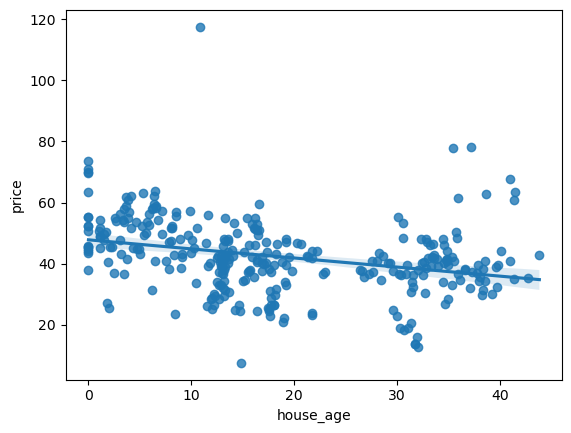

In [55]:
sns.regplot(x=data['house_age'], y=data.price)

<Axes: xlabel='MRTdistance', ylabel='price'>

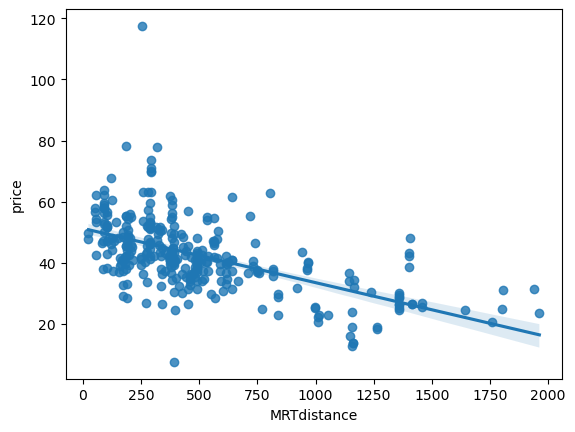

In [56]:
sns.regplot(x=data.MRTdistance, y=data.price)